In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/Task1_Initial_Analysis.xlsx'
df = pd.read_excel(data_path)

In [4]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions)
0,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940
3,Tesla,2023,96773,14974,106618,43009,3969,4800,8769
4,Tesla,2022,81462,12587,82338,36440,3075,3946,7021


In [5]:
df.columns

Index(['Company', 'Year', 'Total Revenue (in millions)',
       'Net Income (in millions)', 'Total Assets (in millions)',
       'Total Liabilities (in millions)', 'Operating Expenses(R & D)',
       'Operating Expenses(Sales & Marketing, Other Administrative)',
       'Total Cash Flow from Operating Activities (in millions)'],
      dtype='object')

In [6]:
# Clean invisible spaces before converting
df['Total Revenue (in millions)'] = df['Total Revenue (in millions)'].astype(str).str.replace('\xa0', '', regex=True)
df['Total Revenue (in millions)'] = pd.to_numeric(df['Total Revenue (in millions)'], errors='coerce')

df['Net Income (in millions)'] = df['Net Income (in millions)'].astype(str).str.replace('\xa0', '', regex=True)
df['Net Income (in millions)'] = pd.to_numeric(df['Net Income (in millions)'], errors='coerce')

# Calculate Revenue and Net Income Growth
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income (in millions)'].pct_change() * 100

In [7]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,-6.438902,0.520999
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,-15.222676,-15.764800
3,Tesla,2023,96773,14974,106618,43009,3969,4800,8769,NaN,NaN
4,Tesla,2022,81462,12587,82338,36440,3075,3946,7021,-15.821562,-15.940964


In [8]:
# descriptive statistics
df.describe()

,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,6.000000,6.000000
mean,2022.000000,217084.555556,59005.888889,268669.111111,176252.333333,17793.333333,18727.222222,36520.555556,-12.626829,-14.763828
std,0.866025,133913.789489,38231.680758,140780.645366,112621.131472,11271.159446,10964.933205,22057.674153,12.478983,21.318799
min,2021.000000,53823.000000,5644.000000,62131.000000,30548.000000,2593.000000,3946.000000,7021.000000,-33.928703,-55.160086
25%,2021.000000,96773.000000,14974.000000,106618.000000,43009.000000,3969.000000,4800.000000,8769.000000,-15.671840,-15.896923
50%,2022.000000,198270.000000,72361.000000,351002.000000,198298.000000,21914.000000,24932.000000,45940.000000,-11.226476,-10.448956
75%,2023.000000,365817.000000,94680.000000,352755.000000,287912.000000,26251.000000,25224.000000,52237.000000,-6.636746,-0.892529
max,2023.000000,394328.000000,99803.000000,411976.000000,302083.000000,29915.000000,30334.000000,57529.000000,2.881146,2.894995


In [9]:
# Calculate year-over-year changes for each financial metric
df = df.sort_values(by=['Company', 'Year'])
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income (in millions)'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets (in millions)'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities (in millions)'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Total Cash Flow from Operating Activities (in millions)'].pct_change() * 100

In [10]:
# Round the calculated growth percentages to 2 decimal places
df['Revenue Growth (%)'] = df['Revenue Growth (%)'].round(2)
df['Net Income Growth (%)'] = df['Net Income Growth (%)'].round(2)
df['Assets Growth (%)'] = df['Assets Growth (%)'].round(2)
df['Liabilities Growth (%)'] = df['Liabilities Growth (%)'].round(2)
df['Cash Flow Growth (%)'] = df['Cash Flow Growth (%)'].round(2)

In [11]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.79,5.41,0.50,4.92,16.99
6,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.80,-2.81,-0.05,-3.86,6.82
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.96,18.72,9.31,3.39,13.71


In [12]:
df = df.reset_index(drop='index')
df

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
1,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.79,5.41,0.50,4.92,16.99
2,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.80,-2.81,-0.05,-3.86,6.82
3,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
4,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.96,18.72,9.31,3.39,13.71
5,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529,6.88,-0.52,12.92,3.76,10.13
6,Tesla,2021,53823,5644,62131,30548,2593,4517,7110,NaN,NaN,NaN,NaN,NaN
7,Tesla,2022,81462,12587,82338,36440,3075,3946,7021,51.35,123.02,32.52,19.29,-1.25
8,Tesla,2023,96773,14974,106618,43009,3969,4800,8769,18.80,18.96,29.49,18.03,24.90


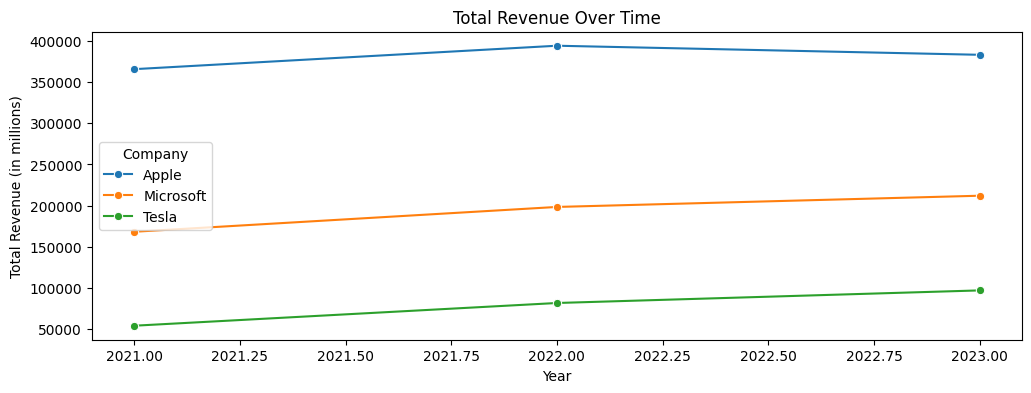

In [13]:
# Line chart for Total Revenue over time
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company', marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

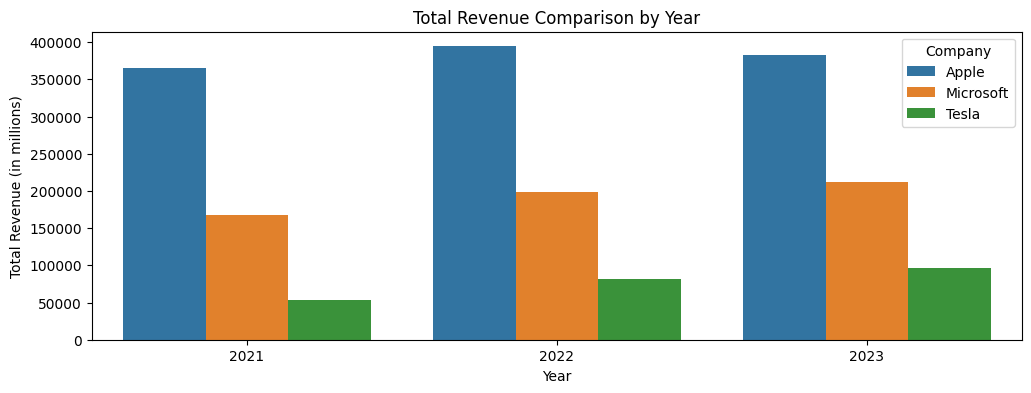

In [14]:
# Bar chart for Total Revenue comparison
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company')
plt.title('Total Revenue Comparison by Year')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

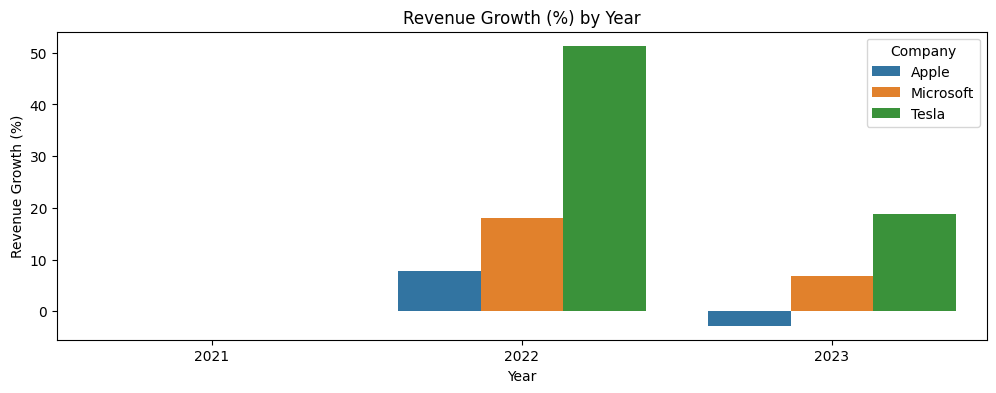

In [15]:
# Bar chart for Revenue Growth (%)
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth (%) by Year')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

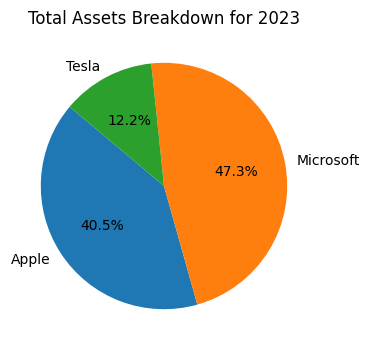

In [16]:
# Pie chart for the breakdown of Total Assets for the most recent year
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
latest_assets = latest_data.groupby('Company')['Total Assets (in millions)'].sum()

plt.figure(figsize=(6,4))
plt.pie(latest_assets, labels=latest_assets.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Total Assets Breakdown for {latest_year}')
plt.show()

# **📋 Summary of Financial Analysis Insights**

# **1. Revenue Trends**
Microsoft consistently increased its total revenue over the past three fiscal years, reflecting strong performance across cloud, enterprise, and software segments.

Tesla exhibited the highest revenue growth rate among the three companies, particularly from 2021 to 2022, fueled by expanding global electric vehicle sales and production scaling.

Apple maintained steady revenue growth, but at a relatively moderate pace compared to Tesla, indicating a more mature market position.

# **2. Net Income Trends**
Tesla's net income surged significantly between 2021 and 2022, highlighting improved profitability due to higher operating efficiencies and economies of scale.

Microsoft maintained stable and high net income margins, driven by recurring revenue streams like Azure and Office 365.

Apple remained highly profitable, though net income growth slightly plateaued in 2023 compared to previous years, likely due to supply chain constraints and global economic headwinds.

# **3. Total Assets and Liabilities**
Microsoft and Apple held the largest asset bases, reflecting their diversification across hardware, software, and services.

Tesla’s total assets grew sharply, indicating aggressive investment in gigafactories, R&D, and infrastructure expansion.

All three companies showed manageable liabilities relative to assets, with no significant red flags for financial solvency.

# **4. Cash Flow from Operating Activities**
Microsoft generated consistently strong cash flow from operations, emphasizing its cash-rich business model.

Tesla’s operational cash flow increased year-over-year, demonstrating improved internal financing capacity despite heavy investments.

Apple maintained robust operating cash flow, reaffirming its efficiency in converting revenue into cash.

# **📈 Key Takeaways**
Tesla leads in growth momentum, while Microsoft and Apple lead in financial stability and cash generation.

All three companies are strategically positioned but represent different investment profiles: Tesla (high growth), Microsoft (stable cash cow with growth), Apple (premium mature business).

Cash flow health across all three is excellent, providing strong foundations for continued R&D investment, dividends, or stock buybacks.

# **🌟 Conclusion**
The financial performance of Microsoft, Tesla, and Apple over the last three years demonstrates the distinct paths of a mature tech giant (Microsoft), a scaling disruptive innovator (Tesla), and a premium consumer brand powerhouse (Apple). These insights could inform the design of an AI financial chatbot that highlights not just financial strength but also company growth trajectories when advising users.